In [1]:
import pandas as pd
import seaborn as sns
import os 

In [2]:
os.chdir('/Users/venkat/Documents')

In [3]:
# Accessing the dataset that provides details about CO2 emissions
co2_data = pd.read_csv('co2_emission.csv')

In [4]:
# Focusing on data in America specifically
us_data = co2_data[co2_data['Code']=='USA']

In [120]:
us_data.iloc[49:]

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
19710,United States,USA,1800,2.528160e+05
19711,United States,USA,1801,2.674720e+05
19712,United States,USA,1802,2.894560e+05
19713,United States,USA,1803,2.967840e+05
19714,United States,USA,1804,3.334240e+05
...,...,...,...,...
19923,United States,USA,2013,5.519613e+09
19924,United States,USA,2014,5.568759e+09
19925,United States,USA,2015,5.420804e+09
19926,United States,USA,2016,5.310861e+09


In [121]:
small_us = us_data.iloc[49:]

In [128]:
X = us_data['Year']
y = us_data['Annual CO₂ emissions (tonnes )']

In [129]:
# splitting the data so 75% is used to train the model and the rest is used to test it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 41)

In [130]:
# Although the model is much better, it does not seem to be the best one
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(max_depth=None, random_state=0)
# Changing the series value to a DataFrame for model fitting to work
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
rg.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [131]:
pred3 = rg.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Annual CO₂ emissions (tonnes )'>

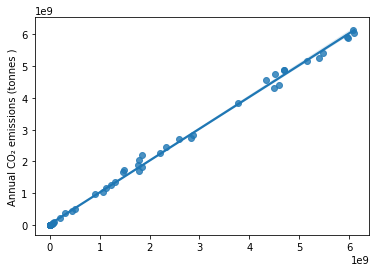

In [132]:
sns.regplot(pred3, y_test) 


In [133]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred3, y_test)

56393268.0255224

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [75]:
#Tests different parameters to see which makes the most accurate predictions
param_grid = {
    "C": [7000, 10000, 100000],
    "epsilon": [0.0001, 0.01],
    "kernel" : ['linear', 'rbf', 'sigmoid'],
    "gamma" : ["scale", "auto"]
    
}

In [77]:
# Split the data into 5 parts
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [7000, 10000, 100000], 'epsilon': [0.0001, 0.01],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [79]:
grid_search.best_params_

{'C': 100000, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [80]:
gr_p = grid_search.predict(X_test)

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Annual CO₂ emissions (tonnes )'>

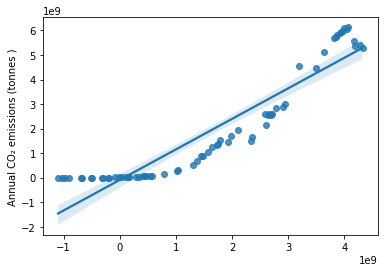

In [81]:
sns.regplot(gr_p, y_test)

In [134]:
mean_absolute_error(gr_p, y_test)

2058063036.3199043

In [135]:
# The best model is STILL the random forest regressor
# About 56,393,268 tons off from the actual values when using 75% data to train